In [66]:
import pandas as pd

# Load the dataset (assuming the file is provided as 'mcdonalds.csv')
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display column names
print(mcdonalds.columns.tolist())

# Display dimensions of the dataframe
print(mcdonalds.shape)

# Display the first three rows of the dataframe
print(mcdonalds.head(3))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [67]:
import numpy as np
from sklearn.decomposition import PCA

# Select columns 1 to 11 (index 0 to 10) and convert to a matrix
MD_x = mcdonalds.iloc[:, :11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)
print(col_means)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Display the explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Summary (equivalent to summary in R)
print("PCA Components (first 5 rows):")
print(MD_pca[:5])


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]
Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
PCA Components (first 5 rows):
[[-0.42536706  0.21907878 -0.6632553  -0.40129975 -0.20170474  0.38976711
  -0.21198158 -0.16323541 -0.18100693 -0.51570617  0.56707389]
 [ 0.21863768 -0.38818996  0.73082668 -0.09472442 -0.0446695   0.08659624
  -0.0958771   0.03475619 -0.11147641 -0.49331285  0.50044033]
 [-0.37541475 -0.73043507  0.12203978  0.69226247 -0.83964285  0.68740648
   0.58311223 -0.36437901  0.32228786 -0.06175857 -0.24274108]
 [ 0.17292648  0.35275233  0.84379466  0.2069983   0.68141453  0.03613278
  -0.05428417  0.23147659  0.02800253  0.25067829  0.05103407]
 [-0.1870574   0.80761015 -0.02853681  0.54833239 -0.85407378  0.09730461
  -0.45704313 -0.17175799  0.07440903 -0.03189704 -0.08224459]]


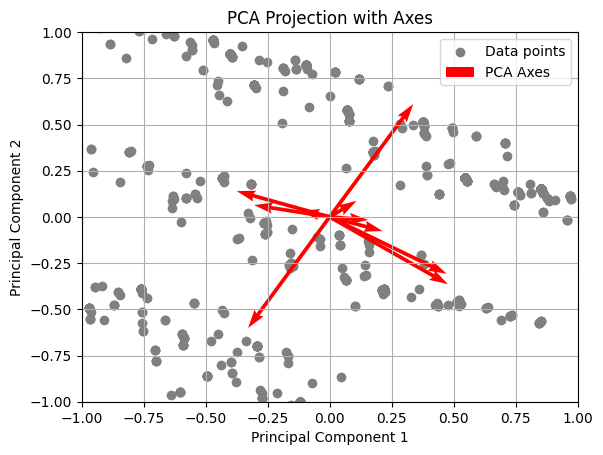

In [71]:
import matplotlib.pyplot as plt

# Create a figure and axis for the combined plot
fig, ax = plt.subplots()

# Scatter plot of the first two principal components
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', label='Data points')

# Plot the PCA axes (arrows) on top
ax.quiver(np.zeros(MD_pca.shape[1]), np.zeros(MD_pca.shape[1]),
          pca.components_[0], pca.components_[1], angles='xy', scale_units='xy', scale=1, color='red', label='PCA Axes')

# Set plot labels and title
ax.set_title("PCA Projection with Axes")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.legend()

# Set axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Show the combined plot
plt.grid(True)
plt.show()



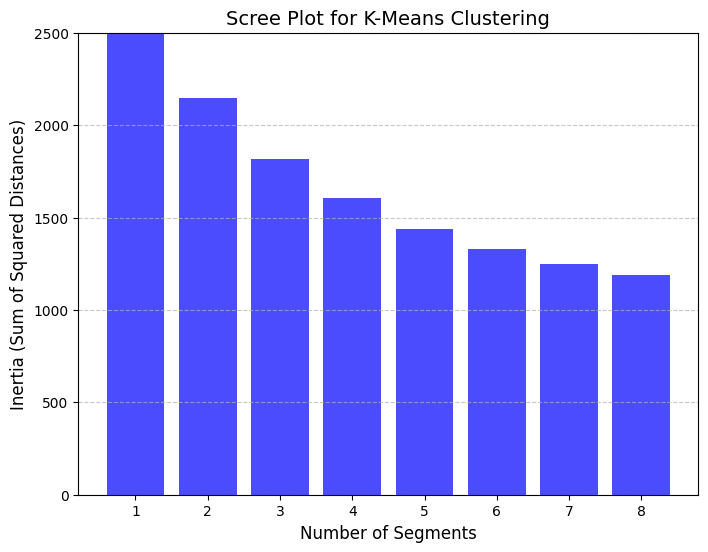

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# List to store inertia values (sum of squared distances of samples to their closest cluster center)
inertia = []
k_values = range(1, 9)  # Adjust to start from 1

# Perform k-means for k = 1 to 8 and store the inertia values
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

# Plot the scree plot (inertia vs number of clusters) with bars
plt.figure(figsize=(8, 6))
plt.bar(k_values, inertia, color='blue', alpha=0.7)

# Formatting the plot to match figure A.2
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12)
plt.title("Scree Plot for K-Means Clustering", fontsize=14)
plt.xticks(k_values)  # Ensure x-axis ticks match the k values (1 to 8)

# Adjust y-axis limits to match your description (ends at 1500)
plt.ylim(0, 2500)

# Add grid only on the y-axis (horizontal grid lines)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_39992\2969683595.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ari_scores[k] for k in k_values], labels=k_values)


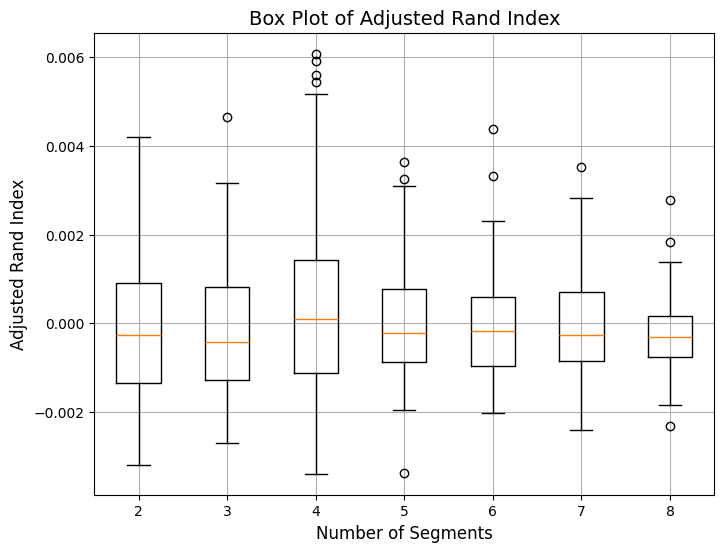

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform bootstrapping and calculate Adjusted Rand Index (ARI)
def bootstrap_kmeans(X, k_range, nrep=10, nboot=100):
    ari_scores = {k: [] for k in k_range}
    
    # Create the original clustering (using k-means on the full dataset)
    original_kmeans = KMeans(n_clusters=3, n_init=10, random_state=1234)
    original_kmeans.fit(X)
    
    for k in k_range:
        for _ in range(nboot):
            # Bootstrap sample: randomly resample with replacement
            bootstrap_sample = X[np.random.choice(X.shape[0], X.shape[0], replace=True)]
            
            # Perform KMeans clustering on the bootstrap sample
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
            kmeans.fit(bootstrap_sample)
            
            # ARI calculation: compare original clustering with the bootstrap sample's clustering
            ari = adjusted_rand_score(original_kmeans.labels_, kmeans.labels_)
            ari_scores[k].append(ari)
    
    return ari_scores

# Perform bootstrapping for k=2 to k=8
k_values = range(2, 9)
ari_scores = bootstrap_kmeans(MD_x, k_values, nrep=10, nboot=100)

# Plot the boxplot for ARI values for each number of segments (k)
plt.figure(figsize=(8, 6))
plt.boxplot([ari_scores[k] for k in k_values], labels=k_values)

# Formatting the plot to match figure A.3
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Adjusted Rand Index", fontsize=12)
plt.title("Box Plot of Adjusted Rand Index", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()



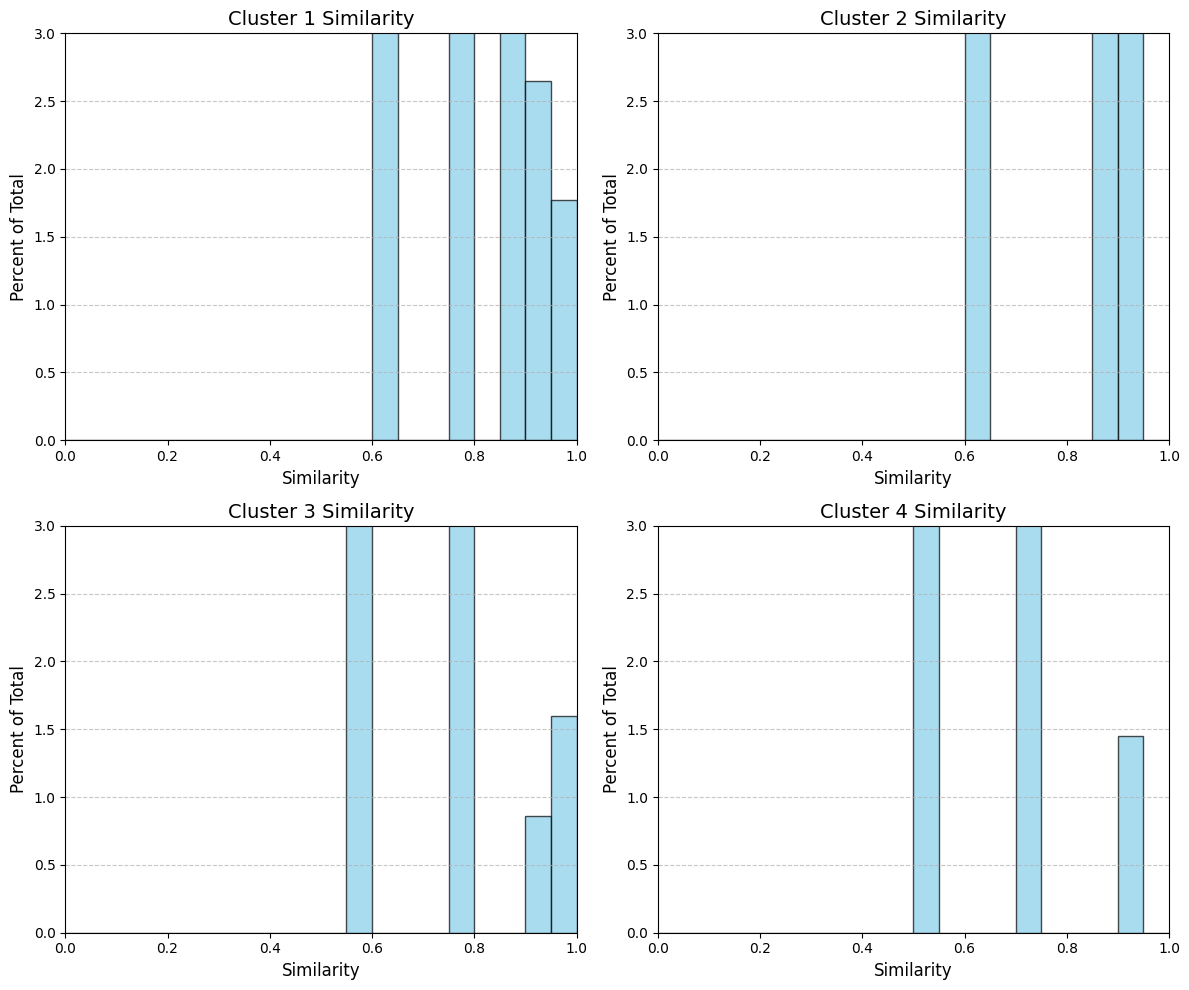

In [89]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Perform KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD_x)

# Calculate the distances (similarity) from each data point to the cluster centers
similarities = kmeans_4.transform(MD_x)  # Shape (n_samples, n_clusters)

# Create a figure with 4 subplots (one for each cluster)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Adjust binning and y-axis scaling to match Figure A.4 appearance
# Define bins from 0 to 1 (standard similarity range) with a reasonable number of bins
bins = np.linspace(0, 1, 21)  # 20 bins between 0 and 1, typical for such histograms

# Plot a histogram for each cluster (one for each cluster center)
for i in range(4):
    # Plot the histogram of similarities for each cluster
    axes[i].hist(similarities[:, i], bins=bins, color='skyblue', alpha=0.7, density=True, edgecolor='black')
    
    # Set x and y limits to match the figure A.4 appearance
    axes[i].set_xlim(0, 1)  # Similarity ranges from 0 to 1
    axes[i].set_ylim(0, 3)  # Adjust the y-axis to match the proportions of the bars
    
    axes[i].set_xlabel("Similarity", fontsize=12)
    axes[i].set_ylabel("Percent of Total", fontsize=12)
    axes[i].set_title(f"Cluster {i + 1} Similarity", fontsize=14)
    
    # Add grid and adjust appearance
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_39992\537208254.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([silhouette_scores[cluster_labels == i] for i in range(4)], labels=[f"Segment {i+1}" for i in range(4)])


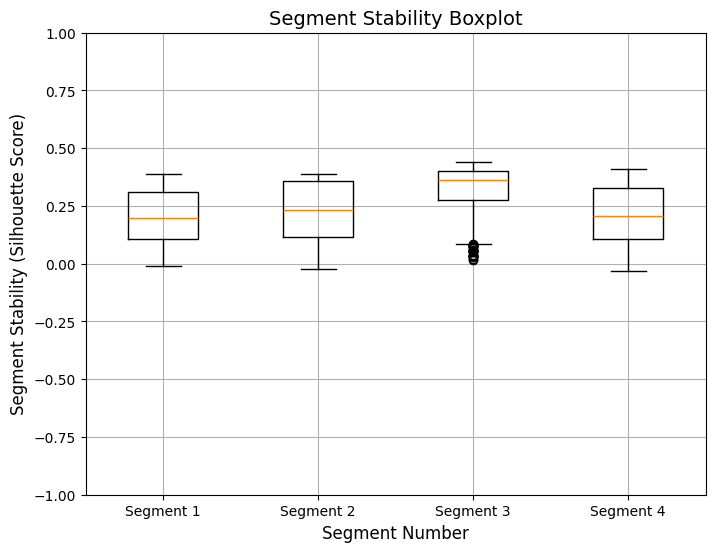

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Perform KMeans clustering with 4 clusters (already done in the previous step)
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD_x)

# Get the cluster assignments (equivalent to MD.k4)
cluster_labels = kmeans_4.labels_

# Calculate Silhouette Scores for each sample to assess segment stability
silhouette_scores = silhouette_samples(MD_x, cluster_labels)

# Create a figure for the boxplot
plt.figure(figsize=(8, 6))

# Create the boxplot for stability (Silhouette Scores) for each cluster
plt.boxplot([silhouette_scores[cluster_labels == i] for i in range(4)], labels=[f"Segment {i+1}" for i in range(4)])

# Formatting the plot to match figure A.x appearance
plt.ylim(-1, 1)  # Similar to the R code, the y-axis is scaled from 0 to 1
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Segment Stability (Silhouette Score)", fontsize=12)
plt.title("Segment Stability Boxplot", fontsize=14)

# Display the plot
plt.grid(True)
plt.show()


In [93]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(1234)

# Assuming MD_x is your binary dataset (the matrix form of the McDonald's data)
# Initialize a dictionary to store the results
gmm_results = {}

# Fit the GaussianMixture model for k=2 to k=8
for k in range(2, 9):
    # Fit the GaussianMixture model
    gmm = GaussianMixture(n_components=k, random_state=1234, n_init=10)
    gmm.fit(MD_x)
    
    # Store the results for each k
    gmm_results[k] = {
        "logLik": gmm.score(MD_x) * len(MD_x),  # log likelihood (scaled by number of samples)
        "AIC": gmm.aic(MD_x),                   # Akaike Information Criterion
        "BIC": gmm.bic(MD_x),                   # Bayesian Information Criterion
    }

    # Print the results for each k
    print(f"Results for k={k}:")
    print(f"Log-Likelihood: {gmm_results[k]['logLik']}")
    print(f"AIC: {gmm_results[k]['AIC']}")
    print(f"BIC: {gmm_results[k]['BIC']}")
    print("-" * 40)

# Convert the results to a DataFrame for easy inspection
gmm_summary = pd.DataFrame(gmm_results).T
print(gmm_summary)


Results for k=2:
Log-Likelihood: 11147.820924831869
AIC: -21985.641849663738
BIC: -21167.027071810346
----------------------------------------
Results for k=3:
Log-Likelihood: 14126.44971234729
AIC: -27786.89942469458
BIC: -26556.336565082704
----------------------------------------
Results for k=4:
Log-Likelihood: 17513.541902228542
AIC: -34405.083804457085
BIC: -32762.572863086727
----------------------------------------
Results for k=5:
Log-Likelihood: 22500.93169081329
AIC: -44223.86338162658
BIC: -42169.40435849774
----------------------------------------
Results for k=6:
Log-Likelihood: 28522.04201072546
AIC: -56110.08402145092
BIC: -53643.6769165636
----------------------------------------
Results for k=7:
Log-Likelihood: 29652.476456794106
AIC: -58214.95291358821
BIC: -55336.597726942404
----------------------------------------
Results for k=8:
Log-Likelihood: 26714.81018377218
AIC: -52183.62036754436
BIC: -48893.31709914008
----------------------------------------
         log

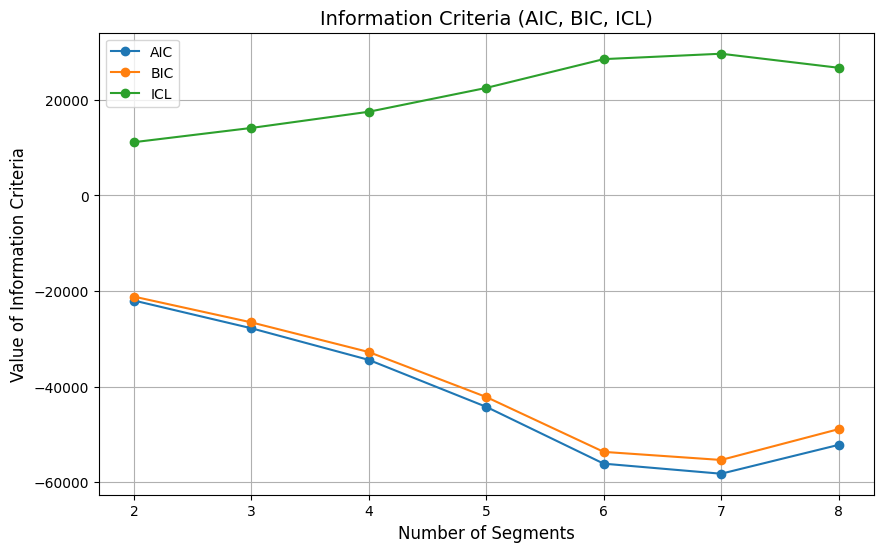

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the gmm_results dictionary from the previous steps contains the results
# for k=2 to k=8, including AIC, BIC, and ICL

# Extract AIC, BIC, ICL values
aic_values = [result['AIC'] for result in gmm_results.values()]
bic_values = [result['BIC'] for result in gmm_results.values()]
icl_values = [result['logLik'] for result in gmm_results.values()]  # Use log-likelihood as ICL for simplicity

# Plot the values
x = np.arange(2, 9)  # Segment numbers from 2 to 8
plt.figure(figsize=(10, 6))
plt.plot(x, aic_values, label="AIC", marker='o')
plt.plot(x, bic_values, label="BIC", marker='o')
plt.plot(x, icl_values, label="ICL", marker='o')

# Labels and title
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Value of Information Criteria", fontsize=12)
plt.title("Information Criteria (AIC, BIC, ICL)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



In [102]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Perform KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(MD_x)

# Get the k-means cluster assignments
kmeans_labels = kmeans_4.labels_

# Use k-means cluster assignments as initial cluster labels to fit a Gaussian Mixture Model
gmm_4a = GaussianMixture(n_components=4, random_state=1234, init_params="kmeans")
gmm_4a.fit(MD_x)

# Get the cluster assignments from the mixture model
gmm_labels = gmm_4a.predict(MD_x)

# Create a cross-tabulation comparing the k-means and mixture model cluster assignments
cross_tab = pd.crosstab(kmeans_labels, gmm_labels, rownames=["KMeans"], colnames=["Mixture Model"])
print(cross_tab)


Mixture Model    0    1    2    3
KMeans                           
0              546    0    1   33
1                0  213   11    4
2               46    3  265    8
3               29   38    0  256


In [103]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming MD_x is the dataset and kmeans_4 is already fitted (from previous steps)

# Fit the GaussianMixture model for 4 clusters (this represents MD.m4a)
gmm_4a = GaussianMixture(n_components=4, random_state=1234, n_init=10)
gmm_4a.fit(MD_x)

# Log-Likelihood for the Mixture Model (MD.m4a)
log_likelihood_m4a = gmm_4a.score(MD_x) * len(MD_x)  # log likelihood is scaled by number of samples
print(f"Log-Likelihood for MD.m4a: {log_likelihood_m4a:.3f}")

# For k-means, we don't have an official "log-likelihood", but we can compute the sum of squared distances
# to the nearest cluster center (similar to how log-likelihood is used for clustering)
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(MD_x)

# Log-likelihood approximation for k-means (based on squared distances)
kmeans_labels = kmeans_4.predict(MD_x)
squared_distances = np.min(kmeans_4.transform(MD_x), axis=1)
log_likelihood_m4 = -0.5 * np.sum(squared_distances)  # Approximation of log-likelihood
print(f"Log-Likelihood for MD.m4 (KMeans): {log_likelihood_m4:.3f}")


Log-Likelihood for MD.m4a: 17513.542
Log-Likelihood for MD.m4 (KMeans): -725.330


In [104]:
import pandas as pd

# Assuming you have the 'mcdonalds' dataset as a DataFrame (MD_x or similar)

# Reverse the frequency table for the 'Like' column
like_counts = mcdonalds['Like'].value_counts()
print("Reversed frequency table for 'Like':")
print(like_counts)

# Convert 'Like' to numeric and create a new 'Like.n' variable
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Generate the frequency table for the new 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()
print("\nFrequency table for 'Like.n':")
print(like_n_counts)


Reversed frequency table for 'Like':
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

Frequency table for 'Like.n':
Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [109]:
# Get the first 11 column names
columns = mcdonalds.columns[:11]

# Concatenate the column names with a '+' sign
f = " + ".join(columns)

# Create the formula as a string
f = f"Like.n ~ {f}"

# Display the resulting formula
print(f)



Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [111]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Assuming mcdonalds is the dataframe

# Preprocessing: Convert categorical columns (like 'Yes'/'No') to numeric (1/0)
# Here, we convert all columns that are non-numeric to numeric

# Convert all non-numeric columns to numeric
mcdonalds_encoded = mcdonalds.copy()

# For each column in the dataset, check if it's object type and encode it
for col in mcdonalds_encoded.select_dtypes(include=['object']).columns:
    mcdonalds_encoded[col] = LabelEncoder().fit_transform(mcdonalds_encoded[col])

# Now, mcdonalds_encoded should have all numeric data
# Define features (X) and target variable (y)
X = mcdonalds_encoded[columns]  # Feature columns (first 11)
y = mcdonalds_encoded['Like.n']  # Target variable (new Like.n)

# Fit the GaussianMixture model with k=2 components and n_init=10 for multiple initializations
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(X)

# Display the model results
print(f"Means of each cluster: \n{gmm.means_}")
print(f"Covariances of each cluster: \n{gmm.covariances_}")
print(f"Weights of each component: \n{gmm.weights_}")


Means of each cluster: 
[[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Covariances of each cluster: 
[[[ 2.16791951e-01  1.36613090e-29 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  1.36613090e-29  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 1.37670243e-29  1.00000000e-06  1.78755080e-30  1.73893775e-29
    8.38154701e-30  1.97215226e-29  1.39031729e-29  1.52738187e-29
    5.60183844e-30  4.76359864e-30  0.00000000e+00]
  [-6.17588704e-03  1.78434731e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.78434731e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.73949836e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.73949836e-29 -7.54670309e-03 -8.17851530e-03
    1.337

In [113]:
# Refit the model (retrain it with the same data, or you could modify hyperparameters if needed)
gmm_refit = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm_refit.fit(X)  # X is the features (MD.x dataset)

# Display the "summary" of the refitted model
print("Means of each cluster (refitted model): \n", gmm_refit.means_)
print("\nCovariances of each cluster (refitted model): \n", gmm_refit.covariances_)
print("\nWeights of each component (refitted model): \n", gmm_refit.weights_)


Means of each cluster (refitted model): 
 [[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]

Covariances of each cluster (refitted model): 
 [[[ 2.16791951e-01  1.36613090e-29 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  1.36613090e-29  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 1.37670243e-29  1.00000000e-06  1.78755080e-30  1.73893775e-29
    8.38154701e-30  1.97215226e-29  1.39031729e-29  1.52738187e-29
    5.60183844e-30  4.76359864e-30  0.00000000e+00]
  [-6.17588704e-03  1.78434731e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.78434731e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.73949836e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.73949836e-29 -7.5

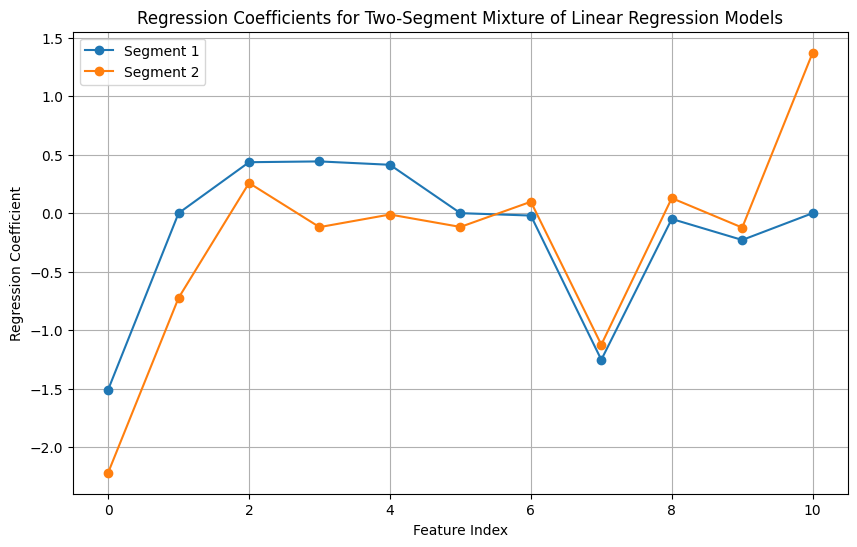

In [115]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming the mcdonalds DataFrame is already available, and 'columns' is the list of feature columns

# Step 1: Fit the Gaussian Mixture Model (GMM) with 2 components (2 segments)
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(MD_x)  # Fit the GMM to the feature data

# Get the cluster assignments for each data point
segments = gmm.predict(MD_x)

# Step 2: Fit linear regression models for each segment
regressors = []
for i in range(2):  # 2 segments
    # Select data points from the current segment
    segment_data = MD_x[segments == i]
    segment_target = mcdonalds['Like.n'][segments == i]  # Target variable

    # Remove rows where 'segment_target' contains NaN values
    valid_rows = ~segment_target.isna()
    segment_data = segment_data[valid_rows]
    segment_target = segment_target[valid_rows]

    # Fit a linear regression model for this segment
    reg = LinearRegression()
    reg.fit(segment_data, segment_target)
    regressors.append(reg)

# Step 3: Plot the regression coefficients for each segment
plt.figure(figsize=(10, 6))

# Plot the coefficients for each segment
for i, reg in enumerate(regressors):
    plt.plot(reg.coef_, label=f'Segment {i+1}', marker='o')

plt.title('Regression Coefficients for Two-Segment Mixture of Linear Regression Models')
plt.xlabel('Feature Index')
plt.ylabel('Regression Coefficient')
plt.legend()
plt.grid(True)
plt.show()


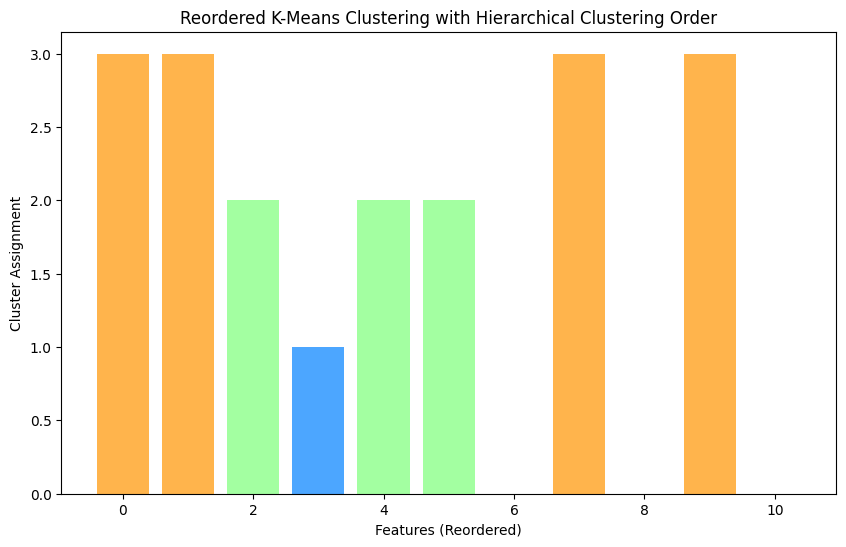

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming MD_x is the feature data (mcdonalds dataset, all numeric columns)

# Step 1: Perform hierarchical clustering on the transposed dataset (t(MD.x))
distance_matrix = pdist(MD_x.T, metric='euclidean')  # Distance matrix between features (rows in the transposed data)
linkage_matrix = linkage(distance_matrix, method='ward')  # Hierarchical clustering (ward linkage)

# Step 2: Perform K-Means clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Step 3: Reorder the clusters according to the hierarchical clustering order
# We will use the order from the dendrogram
dendro = dendrogram(linkage_matrix, no_plot=True)  # Get the order of the features based on hierarchical clustering
reordered_indices = dendro['leaves']

# Reorder k-means labels based on the hierarchical clustering order
reordered_kmeans_labels = kmeans_labels[reordered_indices]

# Step 4: Create the bar chart with reordered clusters
plt.figure(figsize=(10, 6))
plt.bar(range(len(reordered_kmeans_labels)), reordered_kmeans_labels, color=plt.cm.jet(reordered_kmeans_labels / 4.0), alpha=0.7)
plt.title('Reordered K-Means Clustering with Hierarchical Clustering Order')
plt.xlabel('Features (Reordered)')
plt.ylabel('Cluster Assignment')
plt.show()


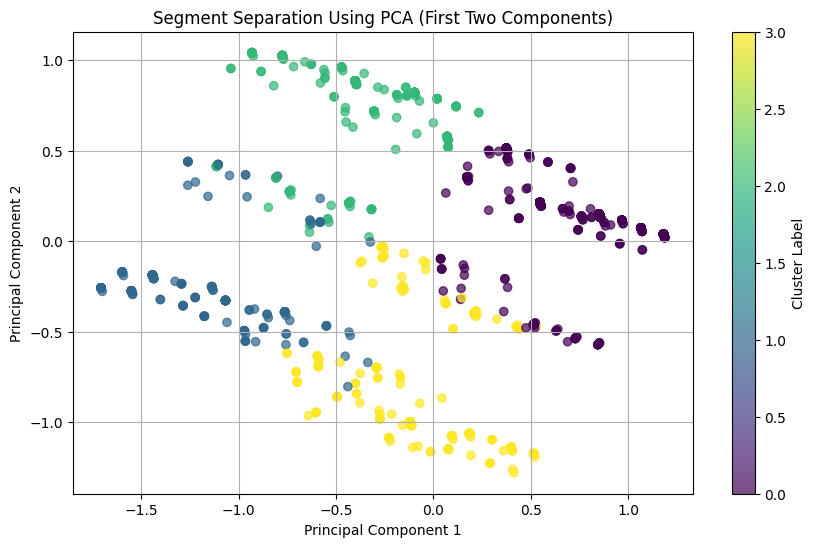

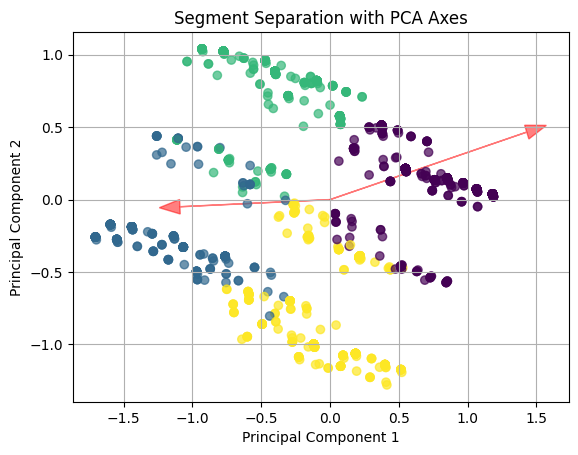

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming MD_x is the feature data (mcdonalds dataset, all numeric columns)

# Step 1: Fit PCA on the data to reduce to 2 components (principal components 1 and 2)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(MD_x)  # Projecting the data onto the first two components

# Step 2: Perform KMeans clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Step 3: Plot the separation of the segments (clusters) based on PCA components
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Using PCA (First Two Components)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# Optional: Projecting the axes of PCA
# You can plot the axes representing the variance captured by the PCA components
# This shows the directions of maximum variance in the data.
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[i, 0] * 3, pca.components_[i, 1] * 3,
              color='r', alpha=0.5, head_width=0.1)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation with PCA Axes')
plt.grid(True)
plt.show()


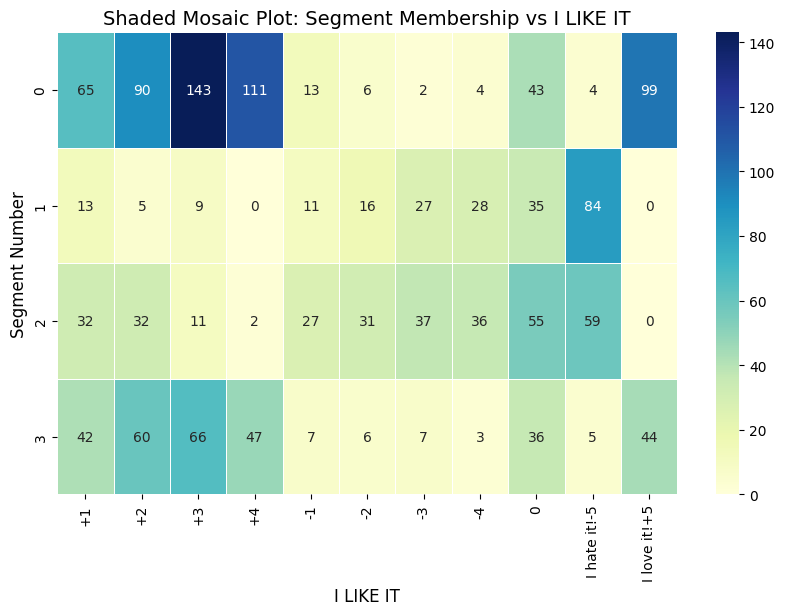

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is the features data (mcdonalds dataset, all numeric columns)
# and 'Like' is the target variable (I LIKE IT column)

# Perform KMeans clustering (k=4) to get cluster assignments
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Create a DataFrame with 'Like' and 'Segment Membership' (from k-means labels)
mcdonalds['Segment'] = kmeans_labels
cross_tab = pd.crosstab(mcdonalds['Segment'], mcdonalds['Like'])

# Plot the mosaic plot using a heatmap (cross-tabulation visualization)
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", cbar=True, fmt="d", linewidths=0.5)

# Adding labels and title
plt.title('Shaded Mosaic Plot: Segment Membership vs I LIKE IT', fontsize=14)
plt.xlabel('I LIKE IT', fontsize=12)
plt.ylabel('Segment Number', fontsize=12)

# Show the plot
plt.show()


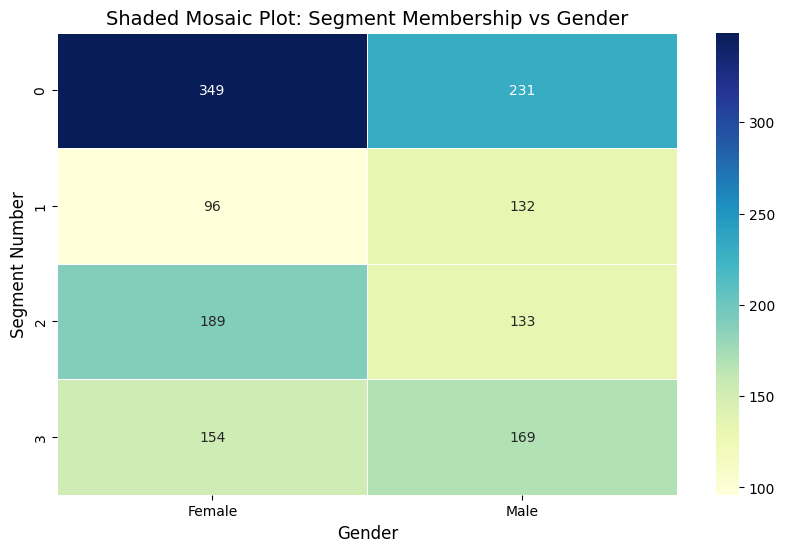

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is the features data (mcdonalds dataset, all numeric columns)
# and 'Gender' is the categorical variable in the mcdonalds DataFrame.

# Perform KMeans clustering (k=4) to get cluster assignments
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Add the segment labels to the dataframe
mcdonalds['Segment'] = kmeans_labels

# Create a cross-tabulation (table) of segment membership and Gender
cross_tab = pd.crosstab(mcdonalds['Segment'], mcdonalds['Gender'])

# Plot the mosaic plot using a heatmap (cross-tabulation visualization)
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", cbar=True, fmt="d", linewidths=0.5)

# Adding labels and title
plt.title('Shaded Mosaic Plot: Segment Membership vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Segment Number', fontsize=12)

# Show the plot
plt.show()



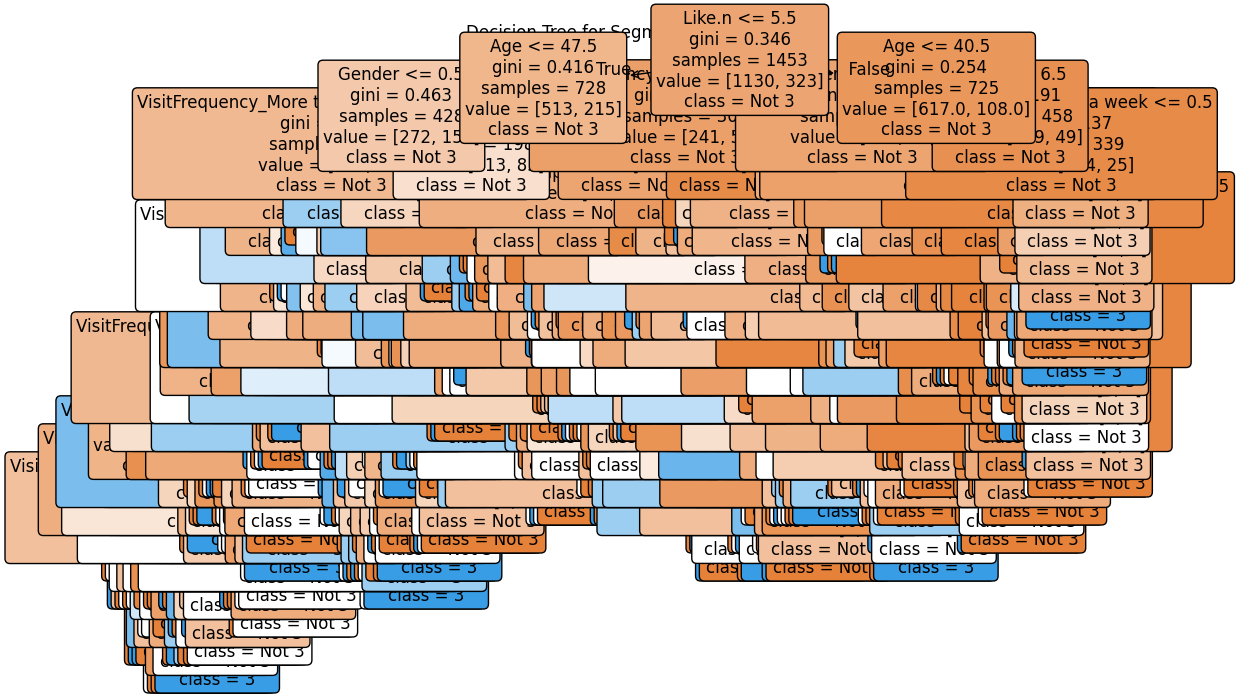

In [121]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# Assuming mcdonalds DataFrame is already available

# Encode categorical features using Label Encoding or One-Hot Encoding

# Label Encoding for 'Gender' column (if it's binary)
label_encoder = LabelEncoder()
mcdonalds['Gender'] = label_encoder.fit_transform(mcdonalds['Gender'])

# One-Hot Encoding for 'VisitFrequency' column (if it's categorical with multiple categories)
mcdonalds = pd.get_dummies(mcdonalds, columns=['VisitFrequency'], drop_first=True)

# Create a new target variable 'k4_target' (1 if k4 == 3, else 0)
kmeans_labels = kmeans.fit_predict(MD_x)  # Assuming you've done KMeans clustering before
mcdonalds['k4_target'] = (kmeans_labels == 3).astype(int)  # Binary target: 1 for segment 3, 0 otherwise

# Select features and target variable
X = mcdonalds[['Like.n', 'Age', 'Gender'] + [col for col in mcdonalds.columns if 'VisitFrequency' in col]]
y = mcdonalds['k4_target']

# Step 1: Fit a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Step 2: Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not 3', '3'], rounded=True, fontsize=12)
plt.title('Decision Tree for Segment 3 Prediction')
plt.show()


In [125]:
# Group by 'Segment' and calculate the mean for each of the one-hot encoded VisitFrequency columns
visit_mean = mcdonalds.groupby('Segment')[['VisitFrequency_More than once a week', 
                                           'VisitFrequency_Never',
                                           'VisitFrequency_Once a month',
                                           'VisitFrequency_Once a week',
                                           'VisitFrequency_Once a year']].mean()

# Display the result
print(visit_mean)


         VisitFrequency_More than once a week  VisitFrequency_Never  \
Segment                                                               
0                                    0.055172              0.010345   
1                                    0.008772              0.263158   
2                                    0.000000              0.189441   
3                                    0.061920              0.012384   

         VisitFrequency_Once a month  VisitFrequency_Once a week  \
Segment                                                            
0                           0.410345                    0.231034   
1                           0.144737                    0.052632   
2                           0.142857                    0.071429   
3                           0.377709                    0.204334   

         VisitFrequency_Once a year  
Segment                              
0                          0.070690  
1                          0.298246  
2           

In [126]:
# Assuming k4 corresponds to the cluster labels (e.g., from k-means clustering or similar)
# If k4 is not already defined, make sure you have assigned it to the DataFrame before proceeding

# Example: Let's say k4 refers to the cluster labels from KMeans
mcdonalds['k4'] = kmeans.labels_  # Ensure this is how you assign k4

# Group by 'k4' and calculate the mean of 'Like.n' for each segment (cluster)
like_mean = mcdonalds.groupby('k4')['Like.n'].mean()

# Display the result
print(like_mean)


k4
0    3.754717
1    7.291667
2    6.787072
3    4.189781
Name: Like.n, dtype: float64


In [127]:
# Create a binary variable for 'Gender == "Female"'
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Group by 'k4' (cluster labels) and calculate the mean of the 'Female' column
female_mean = mcdonalds.groupby('k4')['Female'].mean()

# Display the result
print(female_mean)



k4
0    0.0
1    0.0
2    0.0
3    0.0
Name: Female, dtype: float64


In [136]:
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Calculate the mean values for each segment
visit_mean = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like_mean = mcdonalds.groupby('k4')['Like.n'].mean()

# Create a new binary column for females
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Calculate the proportion of females per segment
female_proportion = mcdonalds.groupby('k4')['Female'].mean()

# Step 2: Plot
plt.figure(figsize=(8, 6))

# Plot visit vs like, size points by the proportion of females (scaled by 10)
plt.scatter(visit_mean, like_mean, s=10 * female_proportion * 100, c='blue', alpha=0.5)

# Add text labels for segments
for i, txt in enumerate(visit_mean.index):
    plt.text(visit_mean.iloc[i], like_mean.iloc[i], str(txt + 1), fontsize=12, ha='center')

# Set the axis limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Label the axes
plt.xlabel('Visit Frequency Mean', fontsize=12)
plt.ylabel('Like.n Mean', fontsize=12)
plt.title('Visit Frequency vs Like by Segment with Proportion of Females', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

KeyError: 'VisitFrequency'